In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd             
import seaborn as sns           
import sklearn                  

# Постановка задачи
## Спрос на бронирование отелей

Предположим, что туристическое агенство в целях улучшения качества своей работы хочет узнать информацию о бронировании отелей, о вероятности отмены бронирования в частности. Источник данных: https://www.kaggle.com/jessemostipak/hotel-booking-demand

## 1. Чтение данных

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dasha-ludina/Machine-Learning/main/hotel_bookings.csv")

Таблица содержит данные о более 119300 бронирований для городского и курортного отелей, а также включает такую информацию, как время бронирования, продолжительность пребывания, количество взрослых, количество доступных парковочных мест и т.д.

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному бронированию) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [3]:
data.shape

(119390, 32)

Метод data.head() отображает первые строки (по умолчанию, 5 строк) таблицы

In [4]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Так же можно вывести последние строки (по умолчанию, 5 строк) таблицы

In [5]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Имена столбцов (признаков) можно получить таким образом:

In [6]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Мы видим, что столбцы (признаки) имеют имена
* hotel - вид отеля(H1 = курортный отель или H2 = городской отель)
* is_canceled - значение, указывающее, было ли бронирование отменено
<br>
Это будут наши классы данных, с которыми мы будем работать:

    + 0 - бронирование было отменено
    + 1 - бронирование не было отменено
* lead_time - количество дней, прошедших между датой ввода бронирования в PMS и датой прибытия
* arrival_date_year - год прибытия
* arrival_date_month - месяц прибытия
* arrival_date_week_number - неделя прибытия
* arrival_date_day_of_month - день прибытия
* stays_in_weekend_nights - количество ночей в выходные(суббота или воскресенье), которые гость проживал или забронировал для проживания в отеле
* stays_in_week_nights - количество ночей в неделю(с понедельника по пятницу), которые гость проживал или забронировал для проживания в отеле
* adults - количество взрослых
* children - количество детей
* babies - количество младенцев
* meal - тип забронированного питания. Категории представлены в стандартных пакетах гостеприимства: Undefined / SC - пакет без питания; BB - кровать и завтрак; HB - полупансион (завтрак и еще один прием пищи - обычно ужин); FB - Полный пансион (завтрак, обед и ужин)
* country - страна
* market_segment - обозначение сегмента рынка. Термин «ТА» означает «Туристические агенты», а «ТО» означает «Туроператоры»
* distribution_channel - канал распространения бронирования
* is_repeated_guest - значение, указывающее, было ли бронирование от повторного гостя(1) или нет(0)
* previous_cancellations - количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования
* previous_bookings_not_canceled - количество предыдущих бронирований, которые не были отменены клиентом до текущего бронирования
* reserved_room_type - код типа номера зарезервирован. Код представлен вместо обозначения в целях анонимности
* assigned_room_type - код для типа номера, назначенного для бронирования
* booking_changes - количество изменений / дополнений, внесенных в бронирование с момента внесения бронирования в PMS до момента заселения или отмены
* deposit_type - индикация того, внес ли клиент залог для гарантии бронирования. Эта переменная может принимать три категории: No Deposit - депозит не был внесен; Non Refund - внесен залог в размере полной стоимости проживания; Refundable - был внесен депозит в размере, меньшем общей стоимости проживания.
* agent - ID туристического агентства, сделавшего бронирование
* company - идентификатор компании / юридического лица, совершившего бронирование или ответственного за его оплату
* days_in_waiting_list - количество дней, в течение которых бронирование находилось в листе ожидания, прежде чем оно было подтверждено клиенту
* customer_type - тип бронирования
* adr - средняя дневная ставка, определяемая делением суммы всех транзакций по размещению на общее количество ночей проживания
* required_car_parking_spaces - количество машиномест, требуемых заказчиком
* total_of_special_requests - количество особых запросов, сделанных клиентом (например, две односпальные кровати или высокий этаж)
* reservation_status - статус последнего бронирования, допускающий одну из трех категорий: Canceled - бронирование было отменено клиентом; Check-Out - клиент зарегистрировался, но уже уехал; No-Show - клиент не заселился и не проинформировал отель о причине
* reservation_status_date - дата, когда был установлен последний статус. Эта переменная может использоваться вместе с ReservationStatus, чтобы понять, когда было отменено бронирование или когда клиент выписался из отеля.

Требуется предсказать бинарный категориальный признак is_canceled по остальным признакам. Это задача классификации.

Имена строк (совпадают с номерами)

In [7]:
data.index

RangeIndex(start=0, stop=119390, step=1)

In [8]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Столбцы, имеющие тип 'Object' содержат категориальные значения. Приведём их к специальному типу, предназначенному для хранения категориальных значений.

In [9]:
data['hotel'] = data['hotel'].astype('category');

In [10]:
data['arrival_date_month'] = data['arrival_date_month'].astype('category');

In [11]:
data['meal'] = data['meal'].astype('category');

In [12]:
data['country'] = data['country'].astype('category');

In [13]:
data['market_segment'] = data['market_segment'].astype('category');

In [14]:
data['distribution_channel'] = data['distribution_channel'].astype('category');

In [15]:
data['reserved_room_type'] = data['reserved_room_type'].astype('category');

In [16]:
data['assigned_room_type'] = data['assigned_room_type'].astype('category');

In [17]:
data['deposit_type'] = data['deposit_type'].astype('category');

In [18]:
data['customer_type'] = data['customer_type'].astype('category');

In [19]:
data['reservation_status'] = data['reservation_status'].astype('category');

In [20]:
data.dtypes

hotel                             category
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                           float64
babies                               int64
meal                              category
country                           category
market_segment                    category
distribution_channel              category
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                category
assigned_room_type                category
booking_changes                      int64
deposit_type                      category
agent      

## 2. Визуализация данных и описательная статистика

Сводную информацию о признаках можем получить, вызвав метод describe, показывающий количество значений, средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

In [21]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


По умолчанию этот метод дает информацию только о количественных признаках. Получим информацию о категориальных, а именно количество значений, количество уникальных значений, самое распространенные значение и частота наиболее распространенного значения.

In [22]:
data.describe(include=['category'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


## Диаграмма зависимости числа забронированных отелей и года

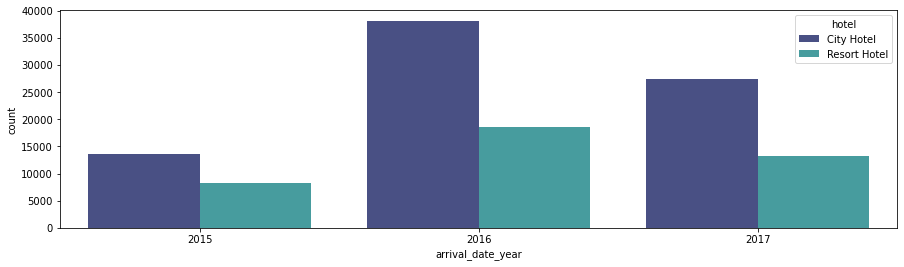

In [23]:
plt.figure(figsize=(15, 4))
sns.countplot(x='arrival_date_year', hue= 'hotel', data=data, palette='mako')
pass

## Диаграмма зависимости числа забронированных отелей и месяца бронирования

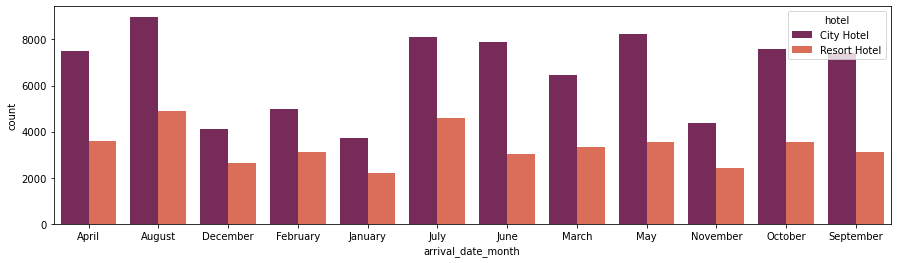

In [24]:
plt.figure(figsize=(15, 4))
sns.countplot(x='arrival_date_month', hue= 'hotel', data=data, palette='rocket')
pass

## Диаграмма зависимости числа забронированных отелей и отмены бронирования

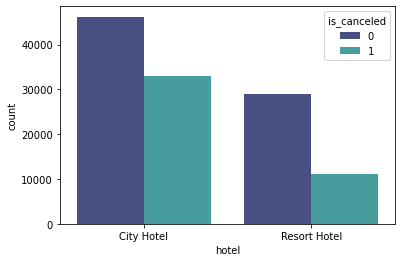

In [25]:
sns.countplot(x='hotel', hue= 'is_canceled', data=data, palette='mako')
pass

## Диаграмма зависимости бронирования

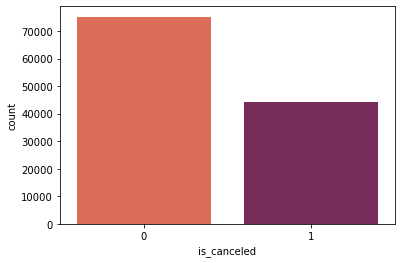

In [26]:
sns.countplot(x='is_canceled', order=data['is_canceled'].value_counts().index,  data=data, palette = 'rocket_r')
pass

График, показывающий зависимость недели прибытия от числа бронирований

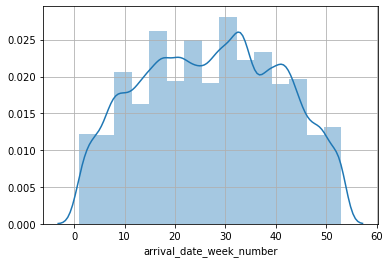

In [27]:
sns.distplot(data['arrival_date_week_number'], bins=15)
plt.grid()
pass

## Ящик с усами

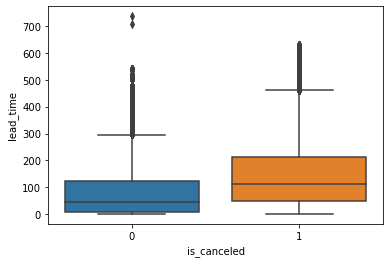

In [28]:
sns.boxplot(x=data["is_canceled"], y=data["lead_time"]);
plt.show()

## Скрипичный график

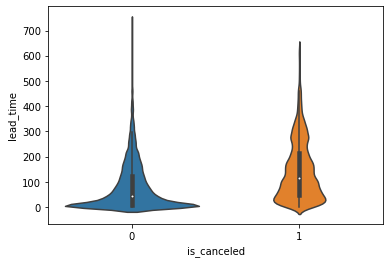

In [29]:
sns.violinplot(x=data["is_canceled"], y=data["lead_time"])
pass

## Корреляционная матрица

Построим матрицу корреляции для числовых признаков:

In [30]:
corr_mat = data.corr()
corr_mat

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


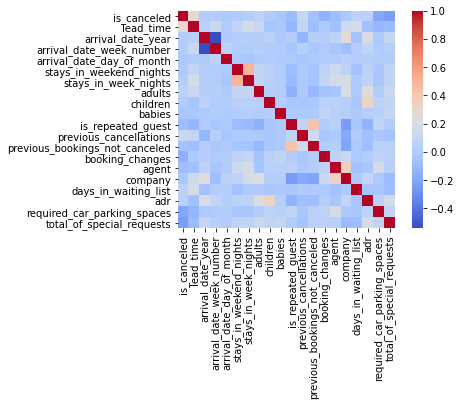

In [31]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

По изображению видно, что признаки практически не коррелируют между собой, так как в большей степени являются независимыми. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции.

## 3. Обработка пропущенных значений

In [32]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Удалим столбец company, так как он почти весь состоит из пропущенных значений

In [33]:
data=data.drop(data.columns[[24]], axis='columns')

In [34]:
data.shape  # было 32 колонка - стало 31

(119390, 31)

Пропущенные значения в столбце agent заполним медианами

In [35]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [36]:
data.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [37]:
data['country'].fillna(data['country'].mode().iloc[0], inplace=True)

In [38]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Видно, что пропущенных значений не осталось

In [39]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,76.744392,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,105.904658,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [40]:
data.describe(include=['category'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,49078,56477,97870,85994,74053,104641,89613,75166


## 4. Векторизация, обработка категориальных признаков

Проведем векторизацию категориальных (номинальных) признаков. Признак is_canceled - категориальный, представленный в виде чисел. Не будем пока включать его ни в categorical_columns, ни в numerical_columns

In [41]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print('categorical_columns=', categorical_columns)
print('numerical_columns=', numerical_columns)

categorical_columns= ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
numerical_columns= ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date']


In [42]:
data_describe = data.describe(include=['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= ['hotel']
nonbinary_columns= ['arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


К небинарными признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Например, в нашей задаче признак arrival_date_month принимает 12 различных значений:

In [43]:
data['arrival_date_month'].unique()

[July, August, September, October, November, ..., February, March, April, May, June]
Length: 12
Categories (12, object): [July, August, September, October, ..., March, April, May, June]

Заменим признак arrival_date_month 12 признаков: arrival_date_month_July, arrival_date_month_August, ..., arrival_date_month_June.

* Если признак arrival_date_month принимает значение July, то признак Tarrival_date_month_July равен 1, а все остальные равны 0.
* Если признак arrival_date_month принимает значение August, то признак arrival_date_month_August равен 1, а все остальные равны 0. и т.д.

Такую векторизацию осуществляет в pandas метод get_dummies.

In [44]:
data[nonbinary_columns]

,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...
119385,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
119386,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out
119387,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
119388,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [45]:
data_categorical = pd.get_dummies(data[nonbinary_columns])
print(data_categorical.columns)

Index(['arrival_date_month_April', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       ...
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reservation_status_Canceled',
       'reservation_status_Check-Out', 'reservation_status_No-Show'],
      dtype='object', length=239)


In [46]:
len(data_categorical.columns)

239

## 5. Нормализация признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению. Не будем нормализовать целевой признак is_canceled


In [47]:
numerical_columns_exept_is_canceled = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

In [48]:
data_numerical_exept_is_canceled = data[numerical_columns_exept_is_canceled]
data_numerical_exept_is_canceled.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,76.744392,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,105.904658,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [49]:
data_numerical_exept_is_canceled = (data_numerical_exept_is_canceled - data_numerical_exept_is_canceled.mean(axis = 0))/data_numerical_exept_is_canceled.std(axis = 0)

In [50]:
data_numerical_exept_is_canceled.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05
mean,-4.810214e-15,-1.368946e-13,7.414698e-16,1.723649e-16,5.805366e-14,2.683450e-15,2.437054e-15,1.854600e-15,-6.143698e-15,-4.172520e-14,5.787542e-14,-8.708821e-15,-1.231855e-15,6.941780e-14,6.828137e-14,6.270327e-14,1.519090e-15,-8.461662e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.733146e-01,-1.634761e+00,-1.923183e+00,-1.685290e+00,-9.288865e-01,-1.310234e+00,-3.204779e+00,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-7.152130e-01,-1.319230e-01,-2.141277e+00,-2.548718e-01,-7.206911e-01
25%,-8.048748e-01,-2.212855e-01,-8.206585e-01,-8.880985e-01,-9.288865e-01,-7.862039e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-6.396734e-01,-1.319230e-01,-6.439223e-01,-2.548718e-01,-7.206911e-01
50%,-3.276287e-01,-2.212855e-01,6.136116e-02,2.297721e-02,7.250190e-02,-2.621733e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,-5.924611e-01,-1.319230e-01,-1.435838e-01,-2.548718e-01,-7.206911e-01
75%,5.239281e-01,1.192190e+00,7.963776e-01,8.201684e-01,1.073890e+00,2.618573e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,-1.815596e-01,-1.031791e-01,-9.155438e-02,-3.389884e-01,7.105977e-01,-1.319230e-01,4.782527e-01,-2.548718e-01,5.406636e-01
max,5.923360e+00,1.192190e+00,1.898902e+00,1.731244e+00,1.809749e+01,2.489129e+01,9.174379e+01,2.482997e+01,1.025497e+02,5.507786e+00,3.069024e+01,4.799061e+01,3.185451e+01,4.327058e+00,2.209065e+01,1.048399e+02,3.235943e+01,5.586082e+00


## Соединяем все в одну таблицу

In [51]:
data = pd.concat((data['is_canceled'], data_numerical_exept_is_canceled, data_categorical), axis = 1)
print(data.shape)

(119390, 258)


In [52]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
count,119390.000000,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,...,119390.000000,119390.000000,119390.000000,119390.00000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,-4.810214e-15,-1.368946e-13,7.414698e-16,1.723649e-16,5.805366e-14,2.683450e-15,2.437054e-15,1.854600e-15,-6.143698e-15,...,0.876464,0.122179,0.001357,0.03414,0.004833,0.750591,0.210436,0.360307,0.629584,0.010110
std,0.482918,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.329053,0.327494,0.036811,0.18159,0.069351,0.432673,0.407620,0.480091,0.482918,0.100038
min,0.000000,-9.733146e-01,-1.634761e+00,-1.923183e+00,-1.685290e+00,-9.288865e-01,-1.310234e+00,-3.204779e+00,-2.606575e-01,-8.157892e-02,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.048748e-01,-2.212855e-01,-8.206585e-01,-8.880985e-01,-9.288865e-01,-7.862039e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,...,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-3.276287e-01,-2.212855e-01,6.136116e-02,2.297721e-02,7.250190e-02,-2.621733e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,...,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,5.239281e-01,1.192190e+00,7.963776e-01,8.201684e-01,1.073890e+00,2.618573e-01,2.478962e-01,-2.606575e-01,-8.157892e-02,...,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,5.923360e+00,1.192190e+00,1.898902e+00,1.731244e+00,1.809749e+01,2.489129e+01,9.174379e+01,2.482997e+01,1.025497e+02,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Разбиение данных на обучающуюю и тестовую выборки

Для классификации по признаку is_canceled, будем использовать все входные признаки.

In [55]:
data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,2.227042,-1.634761,-0.012140,-1.685290,-0.928887,-1.310234,0.247896,-0.260658,-0.081579,...,1,0,0,0,0,1,0,0,1,0
1,0,5.923360,-1.634761,-0.012140,-1.685290,-0.928887,-1.310234,0.247896,-0.260658,-0.081579,...,1,0,0,0,0,1,0,0,1,0
2,0,-0.907810,-1.634761,-0.012140,-1.685290,-0.928887,-0.786204,-1.478441,-0.260658,-0.081579,...,1,0,0,0,0,1,0,0,1,0
3,0,-0.851664,-1.634761,-0.012140,-1.685290,-0.928887,-0.786204,-1.478441,-0.260658,-0.081579,...,1,0,0,0,0,1,0,0,1,0
4,0,-0.842306,-1.634761,-0.012140,-1.685290,-0.928887,-0.262173,0.247896,-0.260658,-0.081579,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,-0.758086,1.192190,0.575873,1.617360,1.073890,1.309918,0.247896,-0.260658,-0.081579,...,1,0,0,0,0,1,0,0,1,0
119386,0,-0.018822,1.192190,0.575873,1.731244,1.073890,1.309918,1.974234,-0.260658,-0.081579,...,1,0,0,0,0,1,0,0,1,0
119387,0,-0.655151,1.192190,0.575873,1.731244,1.073890,1.309918,0.247896,-0.260658,-0.081579,...,1,0,0,0,0,1,0,0,1,0
119388,0,0.046682,1.192190,0.575873,1.731244,1.073890,1.309918,0.247896,-0.260658,-0.081579,...,1,0,0,0,0,1,0,0,1,0


In [56]:
x = data.drop('is_canceled', axis = 1) # выбрасываем столбец 'is_canceled'
y = data['is_canceled']
feature_names = x.columns

In [57]:
type(feature_names)

pandas.core.indexes.base.Index

In [58]:
x = x.to_numpy()

In [59]:
y = y.to_numpy()

In [60]:
print(x.shape)
print(y.shape)
N, d = x.shape

(119390, 257)
(119390,)


Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

89542 29848


## 7. kNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [63]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [64]:
err_test

0.02613240418118467

Подбор параметров для уменьшения ошибки:

In [66]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0253735370820799 5


## 8. Вычисление ошибки на обучающей и тестовой выборках

In [69]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.015400594134596055 0.024189225408737604


## Вывод:

Метод k ближайших соседей отлично справился со своей задачей, так как процент правильно предсказанных значений составляет выще 95% на обучающей и тестовой выборках. По результатам вычислений можно видеть, что при 5 ближайщих соседях метод дает более лучший результат, а именно ошибка на тестовой выборке = 0.024189225408737604, а ошибка на обучающей выборке = 0.015400594134596055

## 9. Метод Random Forest

Применим метод Random Forest: 

In [70]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.0


### Сравнение результатов:

По результатам видно, что метод Random Forest дает более высокую точность на обучающей и тестовой выборках по сравнению с методом ближайших соседей, в данном случае для задачи классификации лучше использовать его.  

# Общие выводы

В результате проделанной работы была решена задача классификации с помощью метода К-ближайших соседей и метода Random Forest, а также была выполнена визуализация и вычисление основных характеристик, обработка пропущенных значений, обработка категориальных признаков, нормализация признаков, разбиение данных на тестовую и обучающую выборки. На основе проделанной работы можно сделать вывод о том, что использование классификации состояния бронирования может при необходимости улучшить его прогнозы. А так же при таком наборе признаков задача классификации по состоянию бронирования решается с хорошей точностью методами kNN и Random Forest.

# ДЗ №2 Обучение сети

Разобъем данные на тестовую и обучающую выборки:

Будем предсказывать, было ли отменено бронирование с помощью нейронной сети:
x - все столбцы, за исключением 'is_canceled', 
y - столбец 'is_canceled'

In [53]:
X = data.drop('is_canceled', axis = 1) # выбрасываем столбец 'is_canceled'
y = data['is_canceled']
feature_names = X.columns
feature_names

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       ...
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reservation_status_Canceled',
       'reservation_status_Check-Out', 'reservation_status_No-Show'],
      dtype='object', length=257)

In [54]:
print(X.shape)
print(y.shape)
N, d = X.shape

(119390, 257)
(119390,)


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

89542 29848


### Обучение классификатора

In [56]:
from sklearn.neural_network import MLPClassifier

Обучение классификатора вида многослойного персептрона. Активационная функция: сигмоида. Один скрытый слой, с количеством
нейронов 100:

In [68]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', random_state=42, solver='lbfgs')

In [69]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибки на обучающей и тестовой выборках:

In [70]:
print("train error: " + str(np.mean(y_train != y_train_pred)), "test error: " + str(np.mean(y_test != y_test_pred)))
print(str(mlp_model.score(X_train, y_train)), str(mlp_model.score(X_test, y_test)))
print("test error: " + str(1 - mlp_model.score(X_test, y_test)))
print("train error: " + str(1 - mlp_model.score(X_train, y_train)))

train error: 0.0 test error: 0.0
1.0 1.0
test error: 0.0
train error: 0.0


Заметим, что переобучения не наблюдается и классификатор на тестовой и тренировочной выборках выдает один и тот же результат.

Повторим обучение для одного слоя, но с количеством нейронов 700

In [71]:
mlp_model = MLPClassifier(hidden_layer_sizes = (700,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(700,), random_state=42,
              solver='lbfgs')

In [72]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [73]:
print("train error:", np.mean(y_train != y_train_pred), "test error:", np.mean(y_test != y_test_pred))
print("train error:", mlp_model.score(X_train, y_train), "test error:", mlp_model.score(X_test, y_test))
print("test error:", 1 - mlp_model.score(X_test, y_test))
print("train error:", 1 - mlp_model.score(X_train, y_train))

train error: 0.0 test error: 0.0
train error: 1.0 test error: 1.0
test error: 0.0
train error: 0.0


Повторим обучение для одного слоя с количеством нейронов 10

In [74]:
mlp_model = MLPClassifier(hidden_layer_sizes = (10,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), random_state=42,
              solver='lbfgs')

In [75]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [76]:
print("train error:", np.mean(y_train != y_train_pred), "test error:", np.mean(y_test != y_test_pred))
print("train error:", mlp_model.score(X_train, y_train), "test error:", mlp_model.score(X_test, y_test))
print("test error:", 1 - mlp_model.score(X_test, y_test))
print("train error:", 1 - mlp_model.score(X_train, y_train))

train error: 0.0 test error: 0.0
train error: 1.0 test error: 1.0
test error: 0.0
train error: 0.0


После серии экспериментов отметим, что при увеличении и уменьшении количества нейронов в однослойной сети не влияет на качество обучения, оно остается неизменным.

Проведем эксперемент для двухслойной нейронной сети:

In [89]:
mlp_model = MLPClassifier(hidden_layer_sizes = (700,2), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(700, 2),
              random_state=42, solver='lbfgs')

In [90]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [91]:
print("train error:", np.mean(y_train != y_train_pred), "test error:", np.mean(y_test != y_test_pred))

train error: 0.36961425923030533 test error: 0.37282229965156793


При добавлении еще одного слоя, значение ошибки на тестовой выборке стало больше, чем на обучающей, значит появилось переобучение хотя и маленькое.

##### Попробуем избавиться от переобучения с помощью изменения количества нейронов в слоях:

In [92]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,2), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 2),
              random_state=42, solver='lbfgs')

In [93]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [94]:
print("train error:", np.mean(y_train != y_train_pred), "test error:", np.mean(y_test != y_test_pred))

train error: 0.0 test error: 0.0


Это наглядный пример одного из способов борьбы с переробучением - упрощение сложности модели(уменьшение кол-ва нейронов).

### Подбор гиперпараметров

Подберем оптимальное значение параметра регуляризации alpha для случая с переобучением (700 нейронов, 2 скрытых слоя), т.к. в однослойной нейронной сети качество предсказаний одинаково при различом кол-ве нейронов и ошибки на тестовой и обучающей выборках равны.

In [95]:
alpha_arr = np.logspace(-5, 3, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (700, 2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

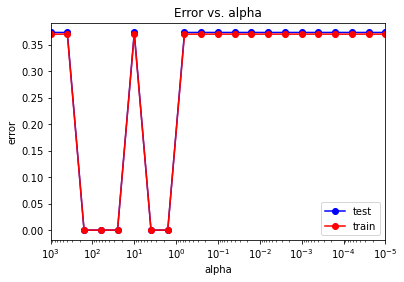

In [96]:
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальные значения ошибки:

In [97]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


Оптимальное значение alpha:

In [98]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

1.584893192461114


Посмотрим на результат обучения при оптимальном alpha

In [99]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (700,2),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0


Как видно при оптимальном альфа качество обучения улучшилось, переобучения нет.

Подберем оптимальное значение количества нейронов опять же для случая с переобучением (700 нейронов, 2 скрытых слоя)

In [57]:
neurons_arr = (1, 2, 5, 10, 20, 50, 100, 200, 500, 700, 800, 900, 1000)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = 1.584893192461114, hidden_layer_sizes = (neuron, 2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

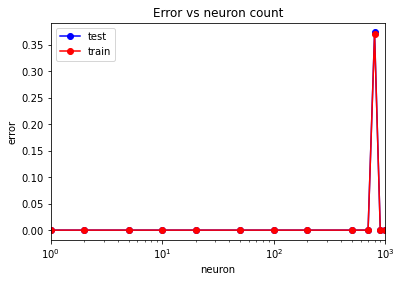

In [58]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron count')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

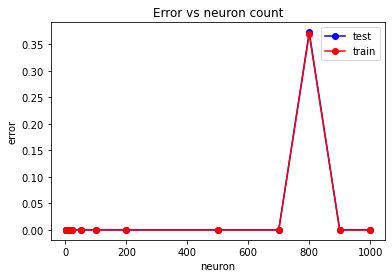

In [59]:
plt.plot(neurons_arr, test_err, 'b-o', label = 'test')
plt.plot(neurons_arr, train_err, 'r-o', label = 'train')
plt.title('Error vs neuron count')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

В данном эксперементе видно, что переобучение возникло на значениях больше 700 и меньше 1000 нейронов

In [60]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


In [61]:
print(test_err)
print(min_test_err)
index=-1
for item in range(0, len(test_err)-1):
    if min_test_err == test_err[item]:
        index=item
        break
neurons_opt = neurons_arr[index]
print(neurons_opt)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.37282229965156793, 0.0, 0.0]
0.0
1


Посмотрим на результат обучения при оптимальном кол-ве нейронов

In [62]:
test_err = []
train_err = []
mlp_model = MLPClassifier(alpha = 1.584893192461114, hidden_layer_sizes = (neurons_opt, 2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0


Как видно при оптимальном кол-ве нейронов регуляризация прошла успешно и качество обучения улучшилось, переобучения нет.

Подберем оптимальное значение количества нейронов для случая с одномерной сетью и оптимальным alpha:

In [72]:
neurons_arr = (1, 2, 5, 10, 20, 50, 100, 200, 500, 700, 800, 900, 1000, 1100, 1200, 1500)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = 1.584893192461114, hidden_layer_sizes = (neuron, ), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

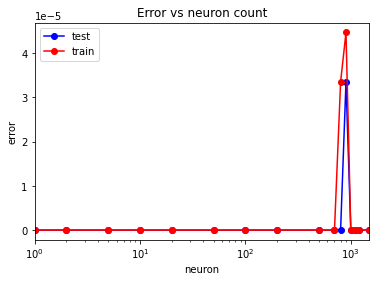

In [73]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron count')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

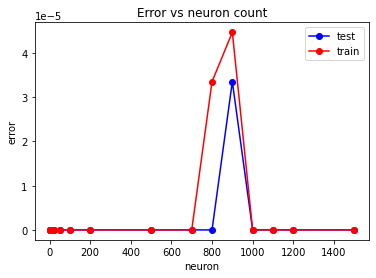

In [74]:
plt.plot(neurons_arr, test_err, 'b-o', label = 'test')
plt.plot(neurons_arr, train_err, 'r-o', label = 'train')
plt.title('Error vs neuron count')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

На графике видно, что при числе нейронов больше 700 и меньше 1000 произошло недообучение.

Посмотрим на результат обучения при оптимальном кол-ве нейронов

In [75]:
print(test_err)
print(min_test_err)
index=-1
for item in range(0, len(test_err)-1):
    if min_test_err == test_err[item]:
        index=item
        break
neurons_opt = neurons_arr[index]
print(neurons_opt)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.350308228357009e-05, 0.0, 0.0, 0.0, 0.0]
0.0
1


In [76]:
test_err = []
train_err = []
mlp_model = MLPClassifier(alpha = 1.584893192461114, hidden_layer_sizes = (neurons_opt, ), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0


# Выводы:

На основе полученных эксперементов можно сделать следующие выводы:
* 1. Ошибка однослойной модели практически не зависит от числа нейронов.
* 2. При добавлении второго скрытого слоя появляется небольшое переобучение, которое можно исправить уменьшением числа нейронов в слоях или подбором оптимального значения параметра регуляризации alpha.
* 3. При alpha<10 ошибка модели зависит от alpha.